In [1]:
import scipy.io as sio
from matplotlib import pyplot as plt 
%matplotlib inline
import numpy as np 
import os 

import mne
import numpy as np
import scipy.io as sio
 

In [2]:
# coding: utf-8

def _loadftfile(path):

    filecontents = sio.whosmat(path)
    
    strucname = filecontents[0][0]

    mat = sio.loadmat(path, squeeze_me=True, struct_as_record=False)
    matstruct = mat[strucname]
    return matstruct 


def _matstruc2mne(matstruct):
    myinfo = mne.create_info(ch_names=list(matstruct.label),sfreq=1/(matstruct.time[1] - matstruct.time[0]),ch_types='eeg')
    ev_arr = mne.EvokedArray(matstruct.individual.mean(axis=0),myinfo)
    ev_arr.set_montage(mne.channels.read_montage("EGI_256"))
    return ev_arr

In [3]:
matfile = '/Users/nicolasfarrugia/Documents/recherche/data_eeg/eeg4sounds/oddball/grav/grav_bin_dev.mat'

mat_bin_dev = _loadftfile(matfile)

matfile = '/Users/nicolasfarrugia/Documents/recherche/data_eeg/eeg4sounds/oddball/grav/grav_bin_std.mat'

mat_bin_std = _loadftfile(matfile)



matfile = '/Users/nicolasfarrugia/Documents/recherche/data_eeg/eeg4sounds/oddball/grav/grav_ste_dev.mat'

mat_ste_dev = _loadftfile(matfile)

matfile = '/Users/nicolasfarrugia/Documents/recherche/data_eeg/eeg4sounds/oddball/grav/grav_ste_std.mat'

mat_ste_std = _loadftfile(matfile)


In [4]:
ev_bin_dev = _matstruc2mne(mat_bin_dev)
ev_bin_std = _matstruc2mne(mat_bin_std)

ev_ste_dev = _matstruc2mne(mat_ste_dev)
ev_ste_std = _matstruc2mne(mat_ste_std)

In [28]:
# Extract data: transpose because the cluster test requires channels to be last
# In this case, inference is done over items. In the same manner, we could
# also conduct the test over, e.g., subjects.
X_bin = [mat_bin_dev.individual.transpose(0, 2, 1),
     mat_bin_std.individual.transpose(0, 2, 1)]

X_ste = [mat_ste_dev.individual.transpose(0, 2, 1),
     mat_ste_std.individual.transpose(0, 2, 1)]
#tfce = dict(start=.2, step=.2)



X_dev = [mat_bin_dev.individual[:,:140,:].transpose(0, 2, 1),
     mat_ste_dev.individual.transpose(0, 2, 1)]

#X_ste = [mat_ste_dev.individual.transpose(0, 2, 1),
#     mat_ste_std.individual.transpose(0, 2, 1)]

In [6]:
tfce = dict(start=1.5, step=.2)

T_obs,clusters,clusters_pb,H0 = mne.stats.spatio_temporal_cluster_test(X,threshold=20,n_permutations=100,out_type='mask')

stat_fun(H1): min=0.000000 max=62.018210
Running initial clustering
Found 35 clusters
Permuting 99 times...
[......................................  ] 96.97%  \   Computing cluster p-values
Done.


In [29]:
T_obs,clusters_dev,clusters_pb,H0 = mne.stats.spatio_temporal_cluster_test(X_dev,threshold=20,n_permutations=100,out_type='mask')

stat_fun(H1): min=0.000000 max=40.676169
Running initial clustering
Found 16 clusters
Permuting 99 times...
[......................................  ] 96.97%  \   Computing cluster p-values
Done.


In [20]:
T_obs,clusters,clusters_pb,H0 = mne.stats.spatio_temporal_cluster_test(X_ste,threshold=20,n_permutations=100,out_type='mask')

stat_fun(H1): min=0.000000 max=32.117890
Running initial clustering
Found 23 clusters
Permuting 99 times...
[......................................  ] 96.97%  \   Computing cluster p-values
Done.


In [153]:
significant_points = clusters[0].reshape(T_obs.shape).T < .05
print(str(significant_points.sum()) + " points selected by clustering ...")

101575 points selected by clustering ...


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-12-499836f414ca>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_joint(title="Deviant vs. Std")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-12-499836f414ca>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_joint(title="Deviant vs. Std")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave


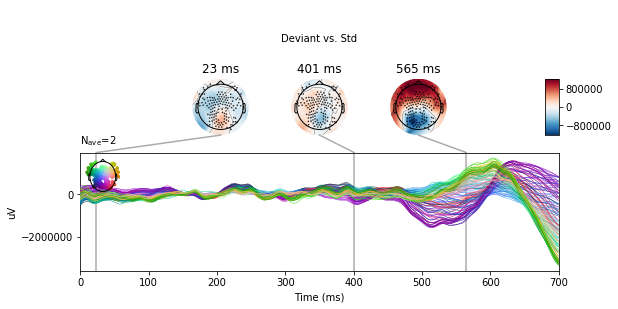

In [12]:
evoked = mne.combine_evoked([ev_bin_dev, -ev_bin_std],
                            weights='equal')  # calculate difference wave
time_unit = dict(time_unit="ms")
evoked.plot_joint(title="Deviant vs. Std")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave
plt.show()

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


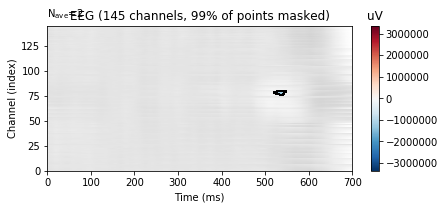

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


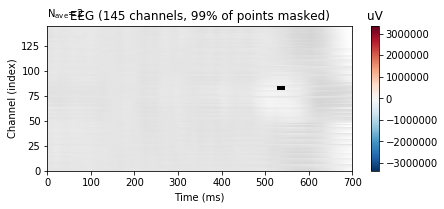

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


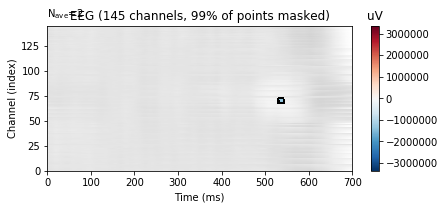

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


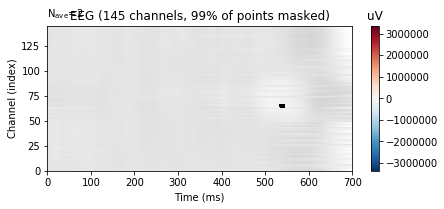

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


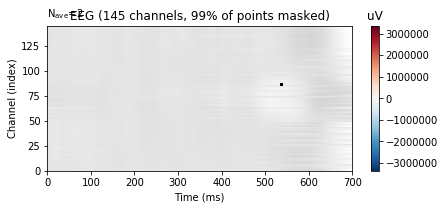

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


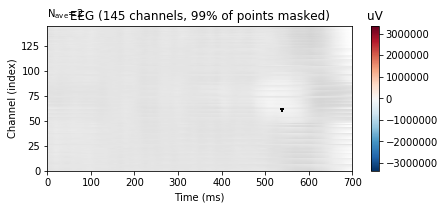

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


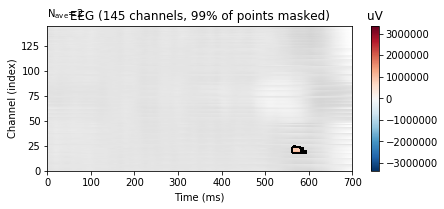

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


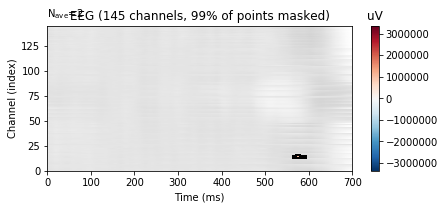

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


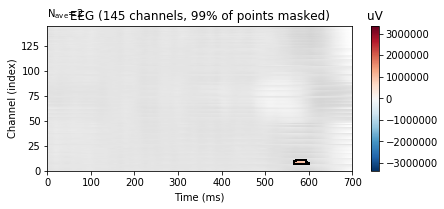

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


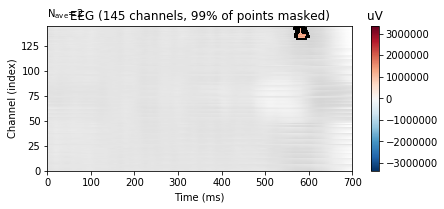

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


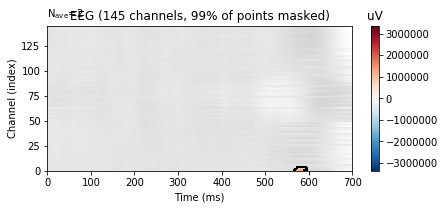

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


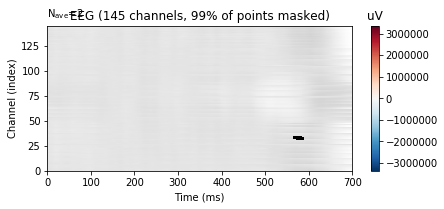

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


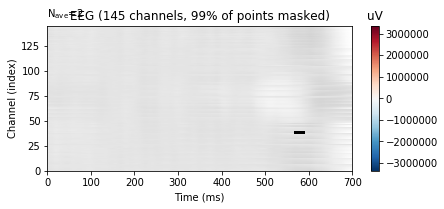

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


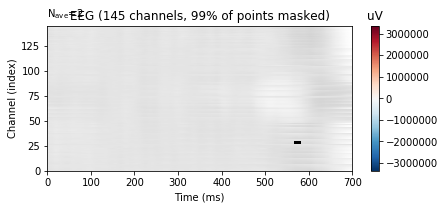

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


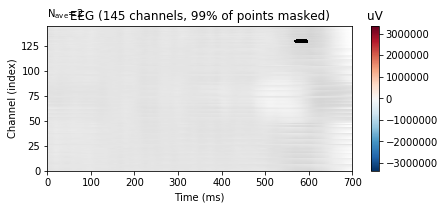

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


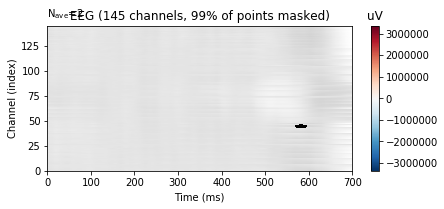

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


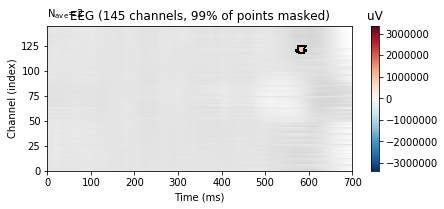

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


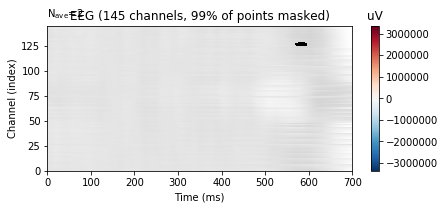

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


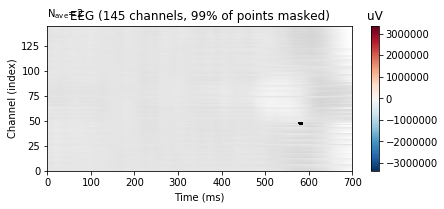

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


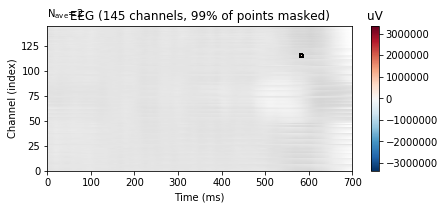

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


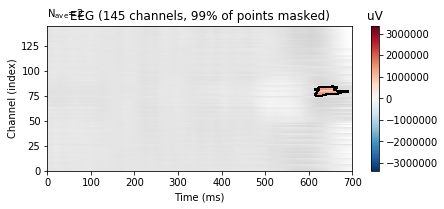

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


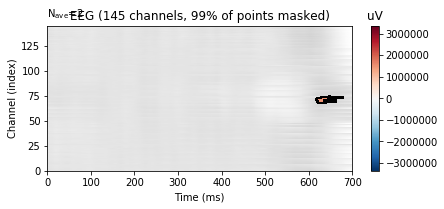

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


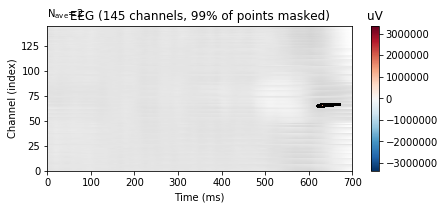

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


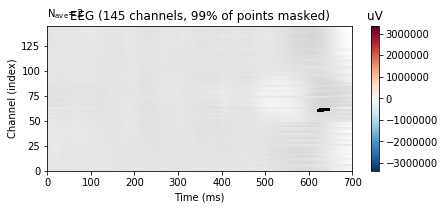

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


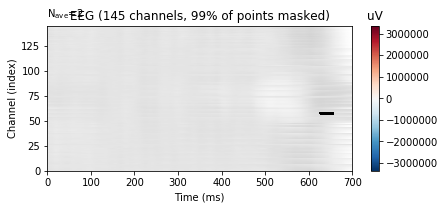

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


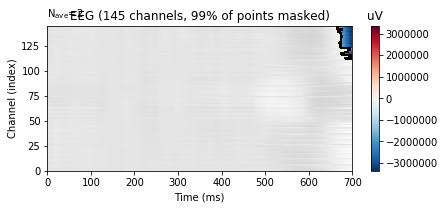

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


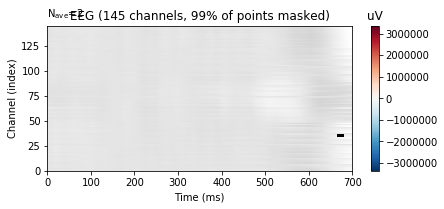

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


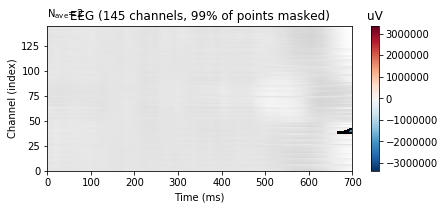

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


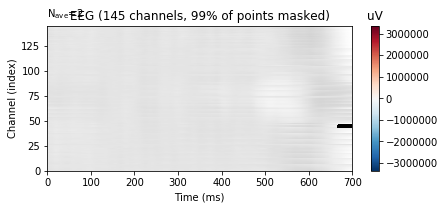

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


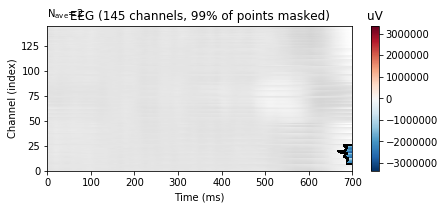

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


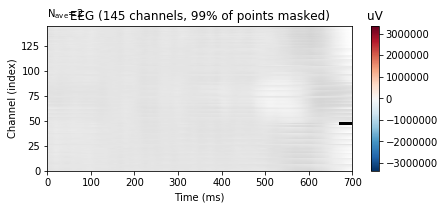

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


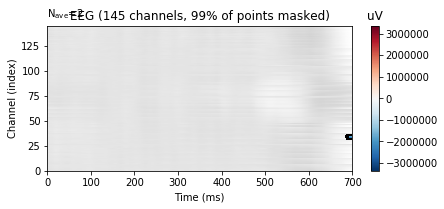

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


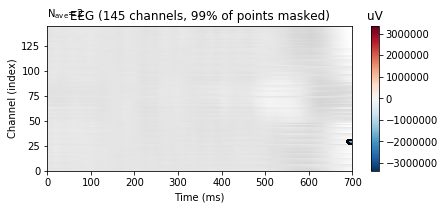

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


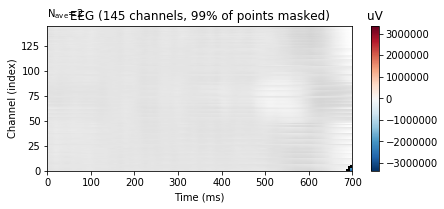

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-18-147c96d54c53>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


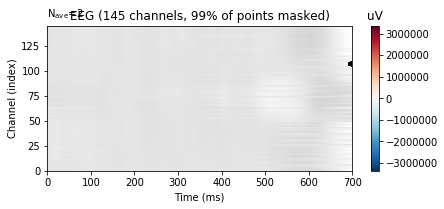

In [18]:
for clust in clusters:
    evoked.plot_image(mask=clust.T)

    plt.show()

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


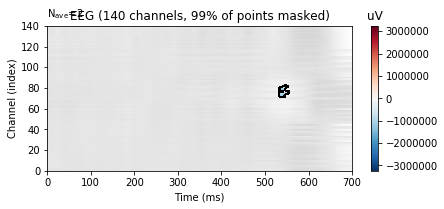

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


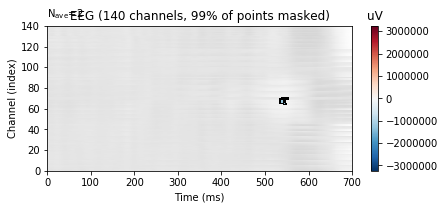

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


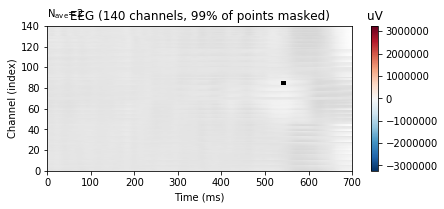

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


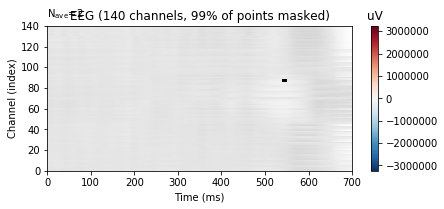

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


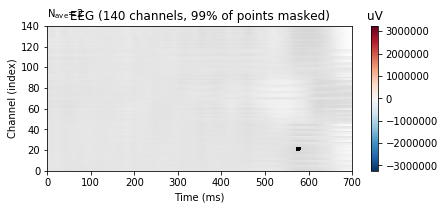

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


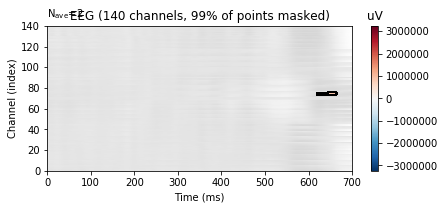

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


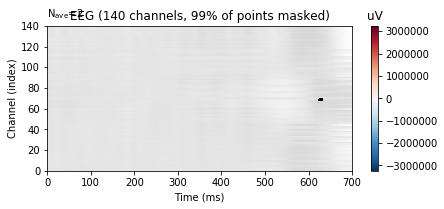

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


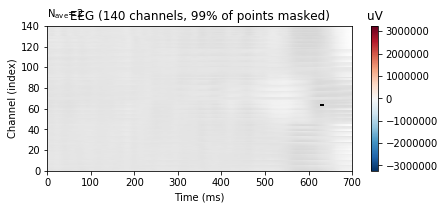

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


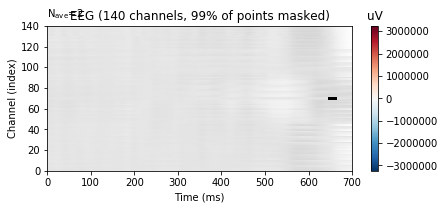

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


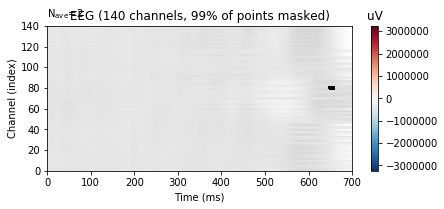

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


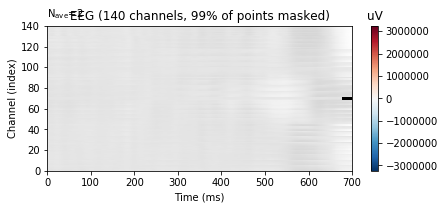

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


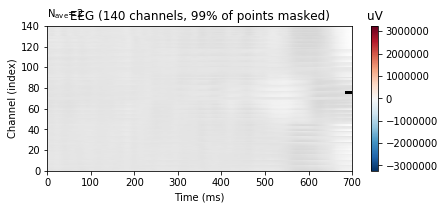

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


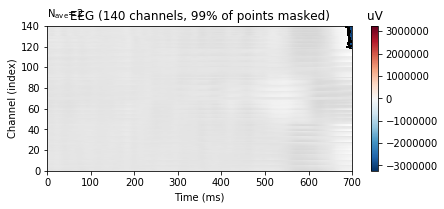

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


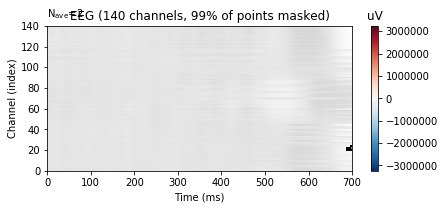

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


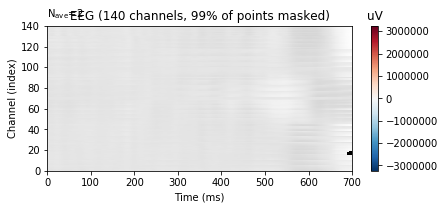

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


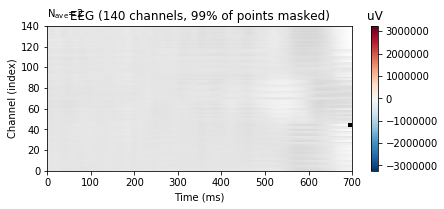

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


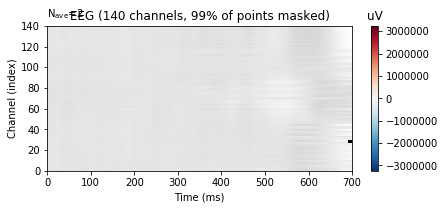

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


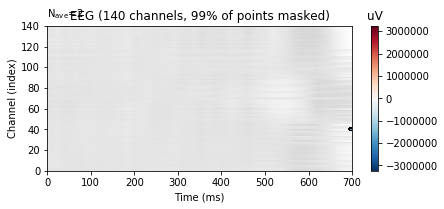

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


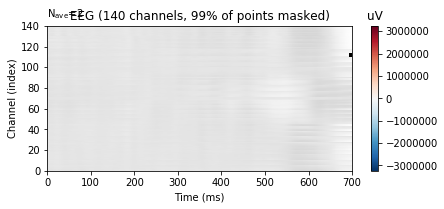

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


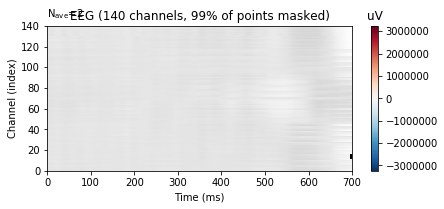

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


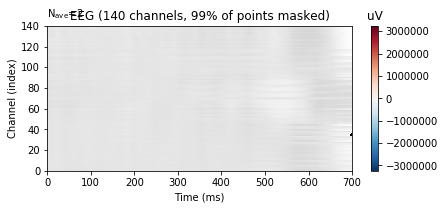

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


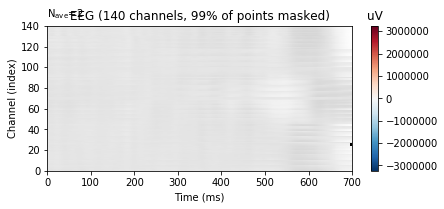

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-22-95772fba99e6>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T)


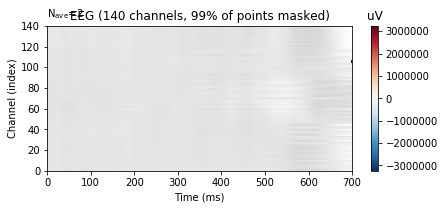

In [22]:
evoked = mne.combine_evoked([ev_ste_dev, -ev_ste_std],
                            weights='equal')  # calculate difference wave


for clust in clusters:
    evoked.plot_image(mask=clust.T)
    plt.show()

In [30]:
evoked = mne.combine_evoked([ev_ste_dev, -ev_bin_dev],
                            weights='equal')  # calculate difference wave


for clust in clusters:
    evoked.plot_image(mask=clust.T)
    plt.show()

ValueError: <Evoked  |  '' (mean, N=1), [0, 0.7] sec, 140 ch, ~1.1 MB> and <Evoked  |  '-unknown' (mean, N=1), [0, 0.7] sec, 145 ch, ~1.1 MB> do not contain the same channels